In [1]:
import pandas as pd
import json
import requests
import time
from tqdm import tqdm

save_path = "/content/drive/MyDrive/EECS6444/RQ2/"

# get resolution status

In [45]:
df = pd.read_csv("/content/drive/MyDrive/EECS6444/RQ2/df_with_cluster.csv")
df.head()

,repo,instance_id,base_commit,patch,test_patch,problem_statement,hints_text,created_at,version,FAIL_TO_PASS,...,has_test_patch,has_patch,difficulty_score,problem_statement_clean,problem_length_words,problem_length_chars,hints_text_clean,has_hint,hint_length,hdbscan_cluster_new
0,astropy/astropy,astropy__astropy-12907,d16bfe05a744909de4b27f5875fe0d4ed41ce607,diff --git a/astropy/modeling/separable.py b/a...,diff --git a/astropy/modeling/tests/test_separ...,Modeling's `separability_matrix` does not comp...,NaN,2022-03-03T15:14:54Z,4.3,"[""astropy/modeling/tests/test_separable.py::te...",...,True,True,0.016866,Modeling's `separability_matrix` does not comp...,158,1246,NaN,0,0,2
1,astropy/astropy,astropy__astropy-14182,a5917978be39d13cd90b517e1de4e7a539ffaa48,diff --git a/astropy/io/ascii/rst.py b/astropy...,diff --git a/astropy/io/ascii/tests/test_rst.p...,Please support header rows in RestructuredText...,NaN,2022-12-16T11:13:37Z,5.1,"[""astropy/io/ascii/tests/test_rst.py::test_rst...",...,True,True,0.230208,Please support header rows in RestructuredText...,189,1871,NaN,0,0,-1
2,astropy/astropy,astropy__astropy-14365,7269fa3e33e8d02485a647da91a5a2a60a06af61,diff --git a/astropy/io/ascii/qdp.py b/astropy...,diff --git a/astropy/io/ascii/tests/test_qdp.p...,ascii.qdp Table format assumes QDP commands ar...,Welcome to Astropy 👋 and thank you for your fi...,2023-02-06T19:20:34Z,5.1,"[""astropy/io/ascii/tests/test_qdp.py::test_rou...",...,True,True,0.024750,ascii.qdp Table format assumes QDP commands ar...,202,1339,Welcome to Astropy 👋 and thank you for your fi...,1,206,5
3,astropy/astropy,astropy__astropy-14995,b16c7d12ccbc7b2d20364b89fb44285bcbfede54,diff --git a/astropy/nddata/mixins/ndarithmeti...,diff --git a/astropy/nddata/mixins/tests/test_...,"In v5.3, NDDataRef mask propagation fails when...",Welcome to Astropy 👋 and thank you for your fi...,2023-06-27T19:48:18Z,5.2,"[""astropy/nddata/mixins/tests/test_ndarithmeti...",...,True,True,0.039750,"In v5.3, NDDataRef mask propagation fails when...",357,2455,Welcome to Astropy 👋 and thank you for your fi...,1,808,-1
4,astropy/astropy,astropy__astropy-6938,c76af9ed6bb89bfba45b9f5bc1e635188278e2fa,diff --git a/astropy/io/fits/fitsrec.py b/astr...,diff --git a/astropy/io/fits/tests/test_checks...,Possible bug in io.fits related to D exponents...,It is tested with `astropy/io/fits/tests/test_...,2017-12-07T00:01:14Z,1.3,"[""astropy/io/fits/tests/test_checksum.py::Test...",...,True,True,0.029902,Possible bug in io.fits related to D exponents...,76,527,It is tested with `astropy/io/fits/tests/test_...,1,55,7


In [4]:
models = {"ExpeRepair_Claude4":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20250625_ExpeRepair-v1_claude-4-sonnet-20250514/results/results.json",
          "Refact_ai_Agent":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20250425_Refact_Agent/results/results.json",
          "KGCompass_Claude4":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20250906_KGCompass_claude-4-sonnet-20250514/results/results.json",
          "SWE-agent_Claude4":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20250526_sweagent_claude-4-sonnet-20250514/results/results.json",
          "ExpeRepair":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20250613_ExpeRepair-v1.0/results/results.json",
          "Moatless_Tools_Deepseek_V3":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20250111_moatless_deepseek_v3/results/results.json",
          "SWE-Fixer_Qwen25-7b":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20250306_SWE-Fixer_Qwen2.5-7b-retriever_Qwen2.5-72b-editor/results/results.json",
          "SWE-agent_GPT_4o":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20240728_sweagent_gpt4o/results/results.json",
          "SWE-agent_Claude3Opus ":"https://raw.githubusercontent.com/SWE-bench/experiments/refs/heads/main/evaluation/lite/20240402_sweagent_claude3opus/results/results.json"}


In [47]:
# url = models["ExpeRepair_Claude4"]

# response = requests.get(url)
# resolved_issues = response.json()["resolved"]  # This should be a list of issue IDs

In [48]:
# # Create a new column 'resolved_by_model_x' (1 if resolved, 0 if not)
# df["ExpeRepair_Claude4"] = df['instance_id'].apply(lambda x: 1 if x in resolved_issues else 0)


In [49]:
# Iterate over models with progress bar
for model, url in tqdm(models.items(), desc="Processing models"):
    try:
        response = requests.get(url)
        resolved_issues = response.json()["resolved"]  # adjust key if necessary
    except Exception as e:
        print(f"Error loading {model}: {e}")
        continue

    df[model] = df['instance_id'].apply(lambda x: 1 if x in resolved_issues else 0)
    # Sleep to avoid hitting rate limits
    time.sleep(5)

Processing models: 100%|██████████| 9/9 [00:46<00:00,  5.11s/it]


In [51]:
print("\n=== Resolution Percentages ===")
for model in models.keys():
    col_name = model
    if col_name in df.columns:
        resolution_rate = df[col_name].mean() * 100
        print(f"{model}: {resolution_rate:.2f}%")



=== Resolution Percentages ===
ExpeRepair_Claude4: 60.33%
Refact_ai_Agent: 60.00%
KGCompass_Claude4: 58.33%
SWE-agent_Claude4: 56.67%
ExpeRepair: 48.33%
Moatless_Tools_Deepseek_V3: 30.67%
SWE-Fixer_Qwen25-7b: 24.67%
SWE-agent_GPT_4o: 18.33%
SWE-agent_Claude3Opus : 11.67%


In [52]:
df.head()

,repo,instance_id,base_commit,patch,test_patch,problem_statement,hints_text,created_at,version,FAIL_TO_PASS,...,hdbscan_cluster_new,ExpeRepair_Claude4,Refact_ai_Agent,KGCompass_Claude4,SWE-agent_Claude4,ExpeRepair,Moatless_Tools_Deepseek_V3,SWE-Fixer_Qwen25-7b,SWE-agent_GPT_4o,SWE-agent_Claude3Opus
0,astropy/astropy,astropy__astropy-12907,d16bfe05a744909de4b27f5875fe0d4ed41ce607,diff --git a/astropy/modeling/separable.py b/a...,diff --git a/astropy/modeling/tests/test_separ...,Modeling's `separability_matrix` does not comp...,NaN,2022-03-03T15:14:54Z,4.3,"[""astropy/modeling/tests/test_separable.py::te...",...,2,1,1,1,1,1,0,0,0,1
1,astropy/astropy,astropy__astropy-14182,a5917978be39d13cd90b517e1de4e7a539ffaa48,diff --git a/astropy/io/ascii/rst.py b/astropy...,diff --git a/astropy/io/ascii/tests/test_rst.p...,Please support header rows in RestructuredText...,NaN,2022-12-16T11:13:37Z,5.1,"[""astropy/io/ascii/tests/test_rst.py::test_rst...",...,-1,0,0,0,0,0,0,0,0,0
2,astropy/astropy,astropy__astropy-14365,7269fa3e33e8d02485a647da91a5a2a60a06af61,diff --git a/astropy/io/ascii/qdp.py b/astropy...,diff --git a/astropy/io/ascii/tests/test_qdp.p...,ascii.qdp Table format assumes QDP commands ar...,Welcome to Astropy 👋 and thank you for your fi...,2023-02-06T19:20:34Z,5.1,"[""astropy/io/ascii/tests/test_qdp.py::test_rou...",...,5,0,0,0,0,0,0,0,0,0
3,astropy/astropy,astropy__astropy-14995,b16c7d12ccbc7b2d20364b89fb44285bcbfede54,diff --git a/astropy/nddata/mixins/ndarithmeti...,diff --git a/astropy/nddata/mixins/tests/test_...,"In v5.3, NDDataRef mask propagation fails when...",Welcome to Astropy 👋 and thank you for your fi...,2023-06-27T19:48:18Z,5.2,"[""astropy/nddata/mixins/tests/test_ndarithmeti...",...,-1,1,1,1,1,1,1,1,1,1
4,astropy/astropy,astropy__astropy-6938,c76af9ed6bb89bfba45b9f5bc1e635188278e2fa,diff --git a/astropy/io/fits/fitsrec.py b/astr...,diff --git a/astropy/io/fits/tests/test_checks...,Possible bug in io.fits related to D exponents...,It is tested with `astropy/io/fits/tests/test_...,2017-12-07T00:01:14Z,1.3,"[""astropy/io/fits/tests/test_checksum.py::Test...",...,7,1,1,1,1,1,0,1,0,0


In [55]:
# Save the updated dataset
df.to_csv(save_path + "swe-bench_lite_with_resolutions.csv", index=False)
print("Done! Added binary columns for all models.")

Done! Added binary columns for all models.


# Analysis

In [3]:
df = pd.read_csv(save_path + "swe-bench_lite_with_resolutions.csv")

## model vs clusters

In [5]:
model_cols = list(models.keys())
cluster_model_resolution = df.groupby("hdbscan_cluster_new")[model_cols].mean()
cluster_model_resolution
##Resolution rate per cluster × per model

,ExpeRepair_Claude4,Refact_ai_Agent,KGCompass_Claude4,SWE-agent_Claude4,ExpeRepair,Moatless_Tools_Deepseek_V3,SWE-Fixer_Qwen25-7b,SWE-agent_GPT_4o,SWE-agent_Claude3Opus
hdbscan_cluster_new,,,,,,,,,
-1,0.355932,0.355932,0.389831,0.305085,0.237288,0.101695,0.152542,0.050847,0.033898
0,1.000000,1.000000,1.000000,0.250000,0.500000,0.500000,0.250000,0.000000,0.250000
1,0.500000,0.500000,0.250000,0.500000,0.500000,0.500000,0.250000,0.125000,0.125000
2,0.773585,0.698113,0.679245,0.698113,0.603774,0.547170,0.358491,0.358491,0.245283
3,0.500000,0.500000,0.000000,0.500000,0.500000,0.500000,0.000000,0.000000,0.500000
4,0.500000,1.000000,0.500000,0.500000,1.000000,0.500000,0.500000,0.000000,0.000000
5,0.607843,0.640523,0.614379,0.607843,0.503268,0.281046,0.241830,0.183007,0.104575
6,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.333333,0.000000
7,0.812500,0.625000,0.750000,0.750000,0.625000,0.250000,0.187500,0.187500,0.062500


In [6]:
print("=== Resolution Rate per Cluster per Model ===\n")

for model in model_cols:
    print(f"\n--- {model} ---")
    print(df.groupby("hdbscan_cluster_new")[model].mean().round(3))


=== Resolution Rate per Cluster per Model ===


--- ExpeRepair_Claude4 ---
hdbscan_cluster_new
-1    0.356
 0    1.000
 1    0.500
 2    0.774
 3    0.500
 4    0.500
 5    0.608
 6    1.000
 7    0.812
Name: ExpeRepair_Claude4, dtype: float64

--- Refact_ai_Agent ---
hdbscan_cluster_new
-1    0.356
 0    1.000
 1    0.500
 2    0.698
 3    0.500
 4    1.000
 5    0.641
 6    1.000
 7    0.625
Name: Refact_ai_Agent, dtype: float64

--- KGCompass_Claude4 ---
hdbscan_cluster_new
-1    0.390
 0    1.000
 1    0.250
 2    0.679
 3    0.000
 4    0.500
 5    0.614
 6    1.000
 7    0.750
Name: KGCompass_Claude4, dtype: float64

--- SWE-agent_Claude4 ---
hdbscan_cluster_new
-1    0.305
 0    0.250
 1    0.500
 2    0.698
 3    0.500
 4    0.500
 5    0.608
 6    1.000
 7    0.750
Name: SWE-agent_Claude4, dtype: float64

--- ExpeRepair ---
hdbscan_cluster_new
-1    0.237
 0    0.500
 1    0.500
 2    0.604
 3    0.500
 4    1.000
 5    0.503
 6    1.000
 7    0.625
Name: ExpeRepair, dtype: fl

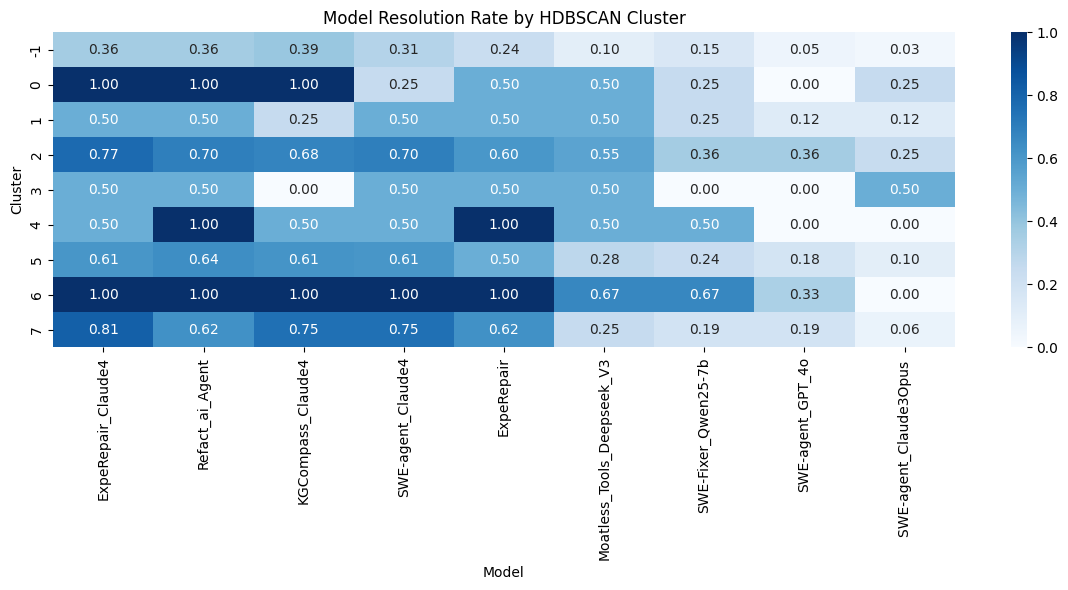

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(cluster_model_resolution, annot=True, fmt=".2f", cmap="Blues")
plt.title("Model Resolution Rate by HDBSCAN Cluster")
plt.xlabel("Model")
plt.ylabel("Cluster")
plt.tight_layout()
plt.savefig(save_path + "model_resolution_heatmap.png")
plt.show()


In [8]:
from scipy.stats import chi2_contingency
import pandas as pd

print("\n=== Chi-square test: Does cluster relate to model success? ===\n")

for model in model_cols:
    contingency = pd.crosstab(df["hdbscan_cluster_new"], df[model])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"{model}: p-value = {p:.4f}")



=== Chi-square test: Does cluster relate to model success? ===

ExpeRepair_Claude4: p-value = 0.0003
Refact_ai_Agent: p-value = 0.0021
KGCompass_Claude4: p-value = 0.0015
SWE-agent_Claude4: p-value = 0.0006
ExpeRepair: p-value = 0.0021
Moatless_Tools_Deepseek_V3: p-value = 0.0001
SWE-Fixer_Qwen25-7b: p-value = 0.2078
SWE-agent_GPT_4o: p-value = 0.0096
SWE-agent_Claude3Opus : p-value = 0.0270


checks whether two categorical variables are related.

A Chi-square test of independence was conducted to examine whether the HDBSCAN clusters of issues are related to the resolution success of different models. The results indicate that, for most models, cluster membership significantly affects resolution outcomes. Specifically, ExpeRepair_Claude4 (p = 0.0003), Refact_ai_Agent (p = 0.0021), KGCompass_Claude4 (p = 0.0015), SWE-agent_Claude4 (p = 0.0006), ExpeRepair (p = 0.0021), Moatless_Tools_Deepseek_V3 (p = 0.0001), and SWE-agent_GPT_4o (p = 0.0096) all showed statistically significant associations between cluster and success rate, suggesting that certain clusters of issues are consistently easier or harder for these models to resolve. In contrast, SWE-Fixer_Qwen25-7b (p = 0.2078) exhibited no significant cluster dependence, indicating more uniform performance across clusters, while SWE-agent_Claude3Opus (p = 0.0270) showed a weaker but still significant cluster effect. These findings imply that the difficulty of resolving issues is not uniformly distributed across clusters and that model performance is influenced by the characteristics captured by the clustering, highlighting potential specialization or limitations of individual models with respect to specific types of issues.

But this can be impacted by sample size (cluster size)

Large clusters dominate the statistics:

Cluster 5 has 153 issues → most resolution outcomes will come from this cluster.

Chi-square p-values are heavily influenced by large clusters.

Small clusters may produce unreliable results:

Clusters 3, 4, 6 have only 2–3 issues each.

Resolution patterns in these tiny clusters might appear extreme but have little statistical weight.

Interpreting p-values:

Even if a model has a significant p-value, part of that could be due to large clusters having many successes/failures.

For small clusters, a few resolved/unresolved issues can look very different from expected counts but are less reliable.

In [9]:
cluster_sizes = df['hdbscan_cluster_new'].value_counts().sort_index()
print(cluster_sizes)


hdbscan_cluster_new
-1     59
 0      4
 1      8
 2     53
 3      2
 4      2
 5    153
 6      3
 7     16
Name: count, dtype: int64


In [11]:
import pandas as pd

# Chi-square results
chi_results = {
    "ExpeRepair_Claude4": 0.0003,
    "Refact_ai_Agent": 0.0021,
    "KGCompass_Claude4": 0.0015,
    "SWE-agent_Claude4": 0.0006,
    "ExpeRepair": 0.0021,
    "Moatless_Tools_Deepseek_V3": 0.0001,
    "SWE-Fixer_Qwen25-7b": 0.2078,
    "SWE-agent_GPT_4o": 0.0096,
    "SWE-agent_Claude3Opus ": 0.0270
}

# Combine with mean resolution rate per model
overall_resolution = cluster_model_resolution.mul(cluster_sizes, axis=0).sum() / cluster_sizes.sum()
summary = pd.DataFrame({
    "Weighted_Resolution": overall_resolution.round(3),
    "Chi_p_value": pd.Series(chi_results)
})

# Identify models significantly impacted by clusters
summary["Cluster_Impact"] = summary["Chi_p_value"].apply(lambda x: "Yes" if x < 0.05 else "No")
summary


,Weighted_Resolution,Chi_p_value,Cluster_Impact
ExpeRepair_Claude4,0.603,0.0003,Yes
Refact_ai_Agent,0.600,0.0021,Yes
KGCompass_Claude4,0.583,0.0015,Yes
SWE-agent_Claude4,0.567,0.0006,Yes
ExpeRepair,0.483,0.0021,Yes
Moatless_Tools_Deepseek_V3,0.307,0.0001,Yes
SWE-Fixer_Qwen25-7b,0.247,0.2078,No
SWE-agent_GPT_4o,0.183,0.0096,Yes
SWE-agent_Claude3Opus,0.117,0.0270,Yes


In [12]:
# Hardest cluster per model
hardest_clusters = cluster_model_resolution.idxmin()
hardest_clusters


,0
ExpeRepair_Claude4,-1
Refact_ai_Agent,-1
KGCompass_Claude4,3
SWE-agent_Claude4,0
ExpeRepair,-1
Moatless_Tools_Deepseek_V3,-1
SWE-Fixer_Qwen25-7b,3
SWE-agent_GPT_4o,0
SWE-agent_Claude3Opus,4


In [13]:
# Easiest cluster per model
easiest_clusters = cluster_model_resolution.idxmax()
easiest_clusters


,0
ExpeRepair_Claude4,0
Refact_ai_Agent,0
KGCompass_Claude4,0
SWE-agent_Claude4,6
ExpeRepair,4
Moatless_Tools_Deepseek_V3,6
SWE-Fixer_Qwen25-7b,6
SWE-agent_GPT_4o,2
SWE-agent_Claude3Opus,3


In [14]:
# Resolution rates of easiest clusters
easiest_rates = cluster_model_resolution.max().round(3)
easiest_summary = pd.DataFrame({
    "Easiest_Cluster": easiest_clusters,
    "Resolution_Rate": easiest_rates
})
easiest_summary


,Easiest_Cluster,Resolution_Rate
ExpeRepair_Claude4,0,1.000
Refact_ai_Agent,0,1.000
KGCompass_Claude4,0,1.000
SWE-agent_Claude4,6,1.000
ExpeRepair,4,1.000
Moatless_Tools_Deepseek_V3,6,0.667
SWE-Fixer_Qwen25-7b,6,0.667
SWE-agent_GPT_4o,2,0.358
SWE-agent_Claude3Opus,3,0.500


In [15]:
hardest_clusters = cluster_model_resolution.idxmin()
hardest_rates = cluster_model_resolution.min().round(3)

extremes_summary = pd.DataFrame({
    "Easiest_Cluster": easiest_clusters,
    "Easiest_Rate": easiest_rates,
    "Hardest_Cluster": hardest_clusters,
    "Hardest_Rate": hardest_rates
})
extremes_summary


,Easiest_Cluster,Easiest_Rate,Hardest_Cluster,Hardest_Rate
ExpeRepair_Claude4,0,1.000,-1,0.356
Refact_ai_Agent,0,1.000,-1,0.356
KGCompass_Claude4,0,1.000,3,0.000
SWE-agent_Claude4,6,1.000,0,0.250
ExpeRepair,4,1.000,-1,0.237
Moatless_Tools_Deepseek_V3,6,0.667,-1,0.102
SWE-Fixer_Qwen25-7b,6,0.667,3,0.000
SWE-agent_GPT_4o,2,0.358,0,0.000
SWE-agent_Claude3Opus,3,0.500,4,0.000


In [16]:
df.head()

,repo,instance_id,base_commit,patch,test_patch,problem_statement,hints_text,created_at,version,FAIL_TO_PASS,...,hdbscan_cluster_new,ExpeRepair_Claude4,Refact_ai_Agent,KGCompass_Claude4,SWE-agent_Claude4,ExpeRepair,Moatless_Tools_Deepseek_V3,SWE-Fixer_Qwen25-7b,SWE-agent_GPT_4o,SWE-agent_Claude3Opus
0,astropy/astropy,astropy__astropy-12907,d16bfe05a744909de4b27f5875fe0d4ed41ce607,diff --git a/astropy/modeling/separable.py b/a...,diff --git a/astropy/modeling/tests/test_separ...,Modeling's `separability_matrix` does not comp...,NaN,2022-03-03T15:14:54Z,4.3,"[""astropy/modeling/tests/test_separable.py::te...",...,2,1,1,1,1,1,0,0,0,1
1,astropy/astropy,astropy__astropy-14182,a5917978be39d13cd90b517e1de4e7a539ffaa48,diff --git a/astropy/io/ascii/rst.py b/astropy...,diff --git a/astropy/io/ascii/tests/test_rst.p...,Please support header rows in RestructuredText...,NaN,2022-12-16T11:13:37Z,5.1,"[""astropy/io/ascii/tests/test_rst.py::test_rst...",...,-1,0,0,0,0,0,0,0,0,0
2,astropy/astropy,astropy__astropy-14365,7269fa3e33e8d02485a647da91a5a2a60a06af61,diff --git a/astropy/io/ascii/qdp.py b/astropy...,diff --git a/astropy/io/ascii/tests/test_qdp.p...,ascii.qdp Table format assumes QDP commands ar...,Welcome to Astropy 👋 and thank you for your fi...,2023-02-06T19:20:34Z,5.1,"[""astropy/io/ascii/tests/test_qdp.py::test_rou...",...,5,0,0,0,0,0,0,0,0,0
3,astropy/astropy,astropy__astropy-14995,b16c7d12ccbc7b2d20364b89fb44285bcbfede54,diff --git a/astropy/nddata/mixins/ndarithmeti...,diff --git a/astropy/nddata/mixins/tests/test_...,"In v5.3, NDDataRef mask propagation fails when...",Welcome to Astropy 👋 and thank you for your fi...,2023-06-27T19:48:18Z,5.2,"[""astropy/nddata/mixins/tests/test_ndarithmeti...",...,-1,1,1,1,1,1,1,1,1,1
4,astropy/astropy,astropy__astropy-6938,c76af9ed6bb89bfba45b9f5bc1e635188278e2fa,diff --git a/astropy/io/fits/fitsrec.py b/astr...,diff --git a/astropy/io/fits/tests/test_checks...,Possible bug in io.fits related to D exponents...,It is tested with `astropy/io/fits/tests/test_...,2017-12-07T00:01:14Z,1.3,"[""astropy/io/fits/tests/test_checksum.py::Test...",...,7,1,1,1,1,1,0,1,0,0


In [17]:
print(df.columns.tolist())

['repo', 'instance_id', 'base_commit', 'patch', 'test_patch', 'problem_statement', 'hints_text', 'created_at', 'version', 'FAIL_TO_PASS', 'PASS_TO_PASS', 'environment_setup_commit', 'predicted_labels', 'predicted_scores', 'all_label_scores', 'bert_topic', 'lda_topic', 'text_clean', 'kmeans_cluster', 'hdbscan_cluster', 'umap_x', 'umap_y', 'n_files_touched', 'added_lines', 'removed_lines', 'patch_total', 'n_failures', 'n_passes_after', 'test_n_files_touched', 'test_added_lines', 'test_removed_lines', 'test_patch_total', 'has_test_patch', 'has_patch', 'difficulty_score', 'problem_statement_clean', 'problem_length_words', 'problem_length_chars', 'hints_text_clean', 'has_hint', 'hint_length', 'hdbscan_cluster_new', 'ExpeRepair_Claude4', 'Refact_ai_Agent', 'KGCompass_Claude4', 'SWE-agent_Claude4', 'ExpeRepair', 'Moatless_Tools_Deepseek_V3', 'SWE-Fixer_Qwen25-7b', 'SWE-agent_GPT_4o', 'SWE-agent_Claude3Opus ']


In [18]:
for model in model_cols:
    mean_resolved = df[df[model]==1]['difficulty_score'].mean()
    mean_unresolved = df[df[model]==0]['difficulty_score'].mean()
    print(f"{model}: mean difficulty (resolved) = {mean_resolved:.2f}, mean difficulty (unresolved) = {mean_unresolved:.2f}")


ExpeRepair_Claude4: mean difficulty (resolved) = 0.05, mean difficulty (unresolved) = 0.10
Refact_ai_Agent: mean difficulty (resolved) = 0.05, mean difficulty (unresolved) = 0.10
KGCompass_Claude4: mean difficulty (resolved) = 0.05, mean difficulty (unresolved) = 0.10
SWE-agent_Claude4: mean difficulty (resolved) = 0.04, mean difficulty (unresolved) = 0.10
ExpeRepair: mean difficulty (resolved) = 0.04, mean difficulty (unresolved) = 0.09
Moatless_Tools_Deepseek_V3: mean difficulty (resolved) = 0.04, mean difficulty (unresolved) = 0.08
SWE-Fixer_Qwen25-7b: mean difficulty (resolved) = 0.04, mean difficulty (unresolved) = 0.07
SWE-agent_GPT_4o: mean difficulty (resolved) = 0.04, mean difficulty (unresolved) = 0.07
SWE-agent_Claude3Opus : mean difficulty (resolved) = 0.04, mean difficulty (unresolved) = 0.07


In [19]:
from scipy.stats import pointbiserialr

for model in model_cols:
    corr, pval = pointbiserialr(df[model], df['difficulty_score'])
    print(f"{model}: correlation = {corr:.3f}, p-value = {pval:.3f}")


ExpeRepair_Claude4: correlation = -0.322, p-value = 0.000
Refact_ai_Agent: correlation = -0.328, p-value = 0.000
KGCompass_Claude4: correlation = -0.321, p-value = 0.000
SWE-agent_Claude4: correlation = -0.331, p-value = 0.000
ExpeRepair: correlation = -0.282, p-value = 0.000
Moatless_Tools_Deepseek_V3: correlation = -0.197, p-value = 0.001
SWE-Fixer_Qwen25-7b: correlation = -0.173, p-value = 0.003
SWE-agent_GPT_4o: correlation = -0.189, p-value = 0.001
SWE-agent_Claude3Opus : correlation = -0.131, p-value = 0.024


## model vs metadata

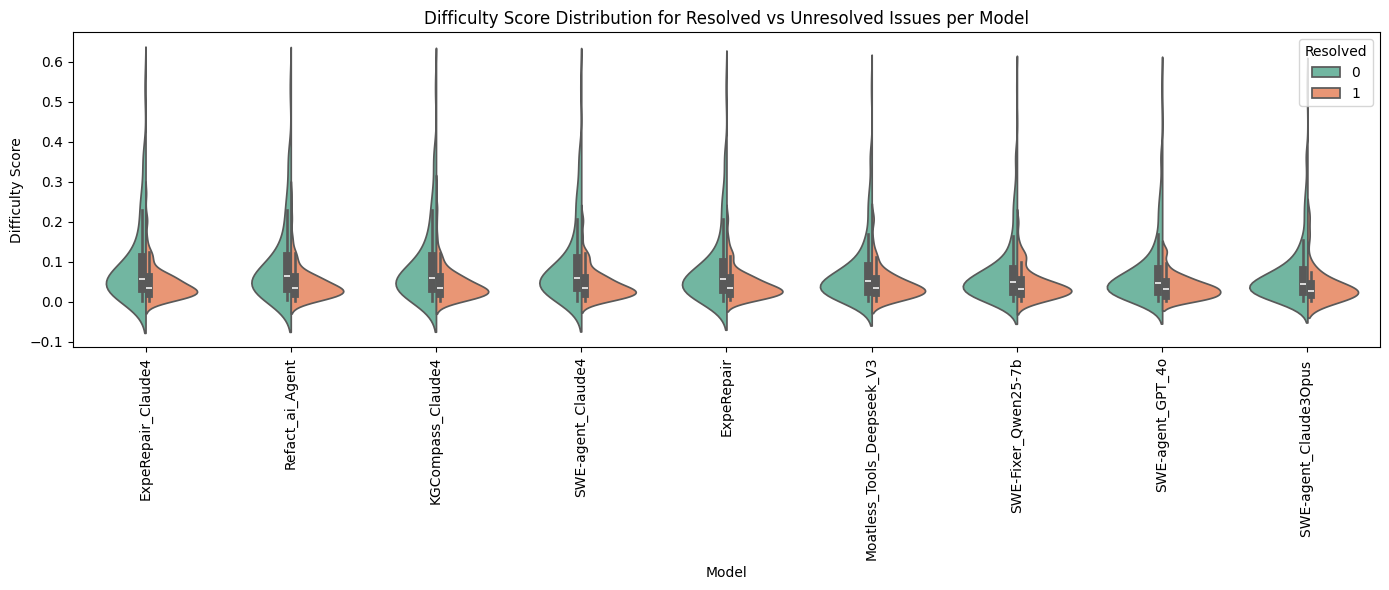

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

# Melt dataframe to long format for seaborn
df_long = df.melt(id_vars=['difficulty_score'], value_vars=model_cols,
                  var_name='Model', value_name='Resolved')

# Plot difficulty score distribution for resolved vs unresolved issues
sns.violinplot(x='Model', y='difficulty_score', hue='Resolved', data=df_long, split=True, palette='Set2')

plt.xticks(rotation=90)
plt.ylabel("Difficulty Score")
plt.title("Difficulty Score Distribution for Resolved vs Unresolved Issues per Model")
plt.legend(title='Resolved', loc='upper right')
plt.tight_layout()
plt.savefig(save_path + "difficulty_score_models_violin.png")
plt.show()


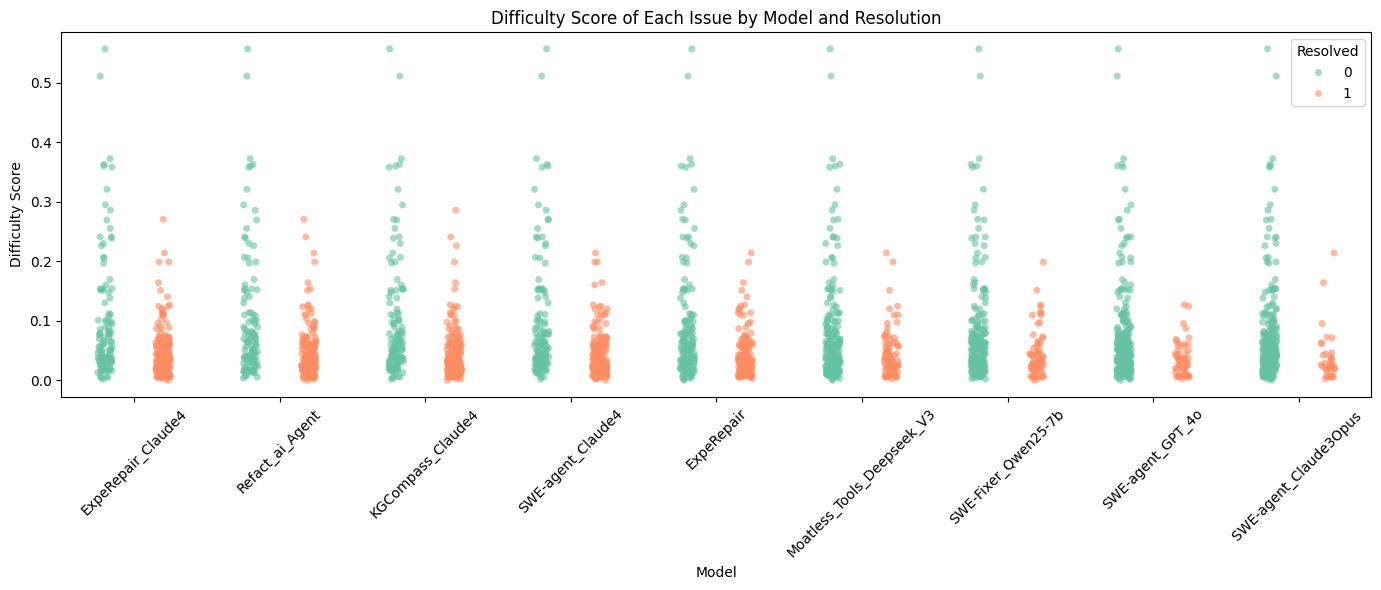

In [23]:
plt.figure(figsize=(14,6))
sns.stripplot(x='Model', y='difficulty_score', hue='Resolved', data=df_long, jitter=True, dodge=True, palette='Set2', alpha=0.6)
plt.xticks(rotation=45)
plt.ylabel("Difficulty Score")
plt.title("Difficulty Score of Each Issue by Model and Resolution")
plt.legend(title='Resolved', loc='upper right')
plt.tight_layout()
plt.show()


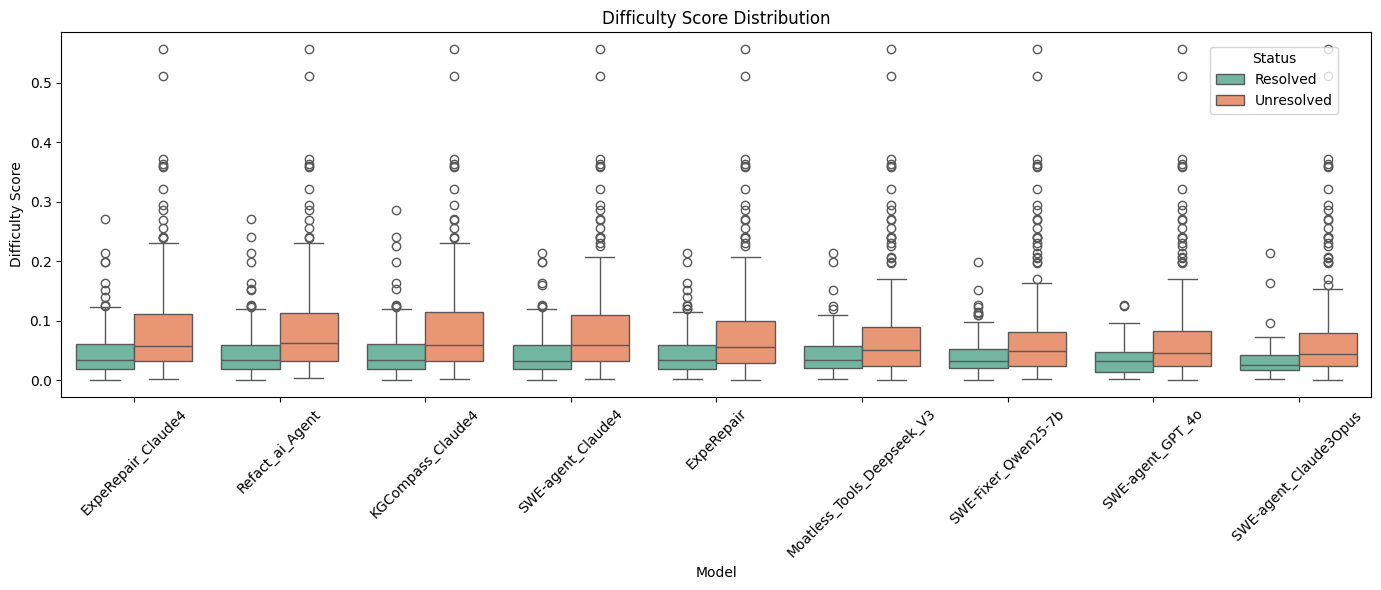

In [32]:
# Map 0/1 to readable labels
df_long['ResolvedLabel'] = df_long['Resolved'].map({1: 'Resolved', 0: 'Unresolved'})

plt.figure(figsize=(14,6))

sns.boxplot(
    x='Model',
    y='difficulty_score',
    hue='ResolvedLabel',
    data=df_long,
    palette='Set2',
    hue_order=['Resolved', 'Unresolved']
)

plt.xticks(rotation=45)
plt.ylabel("Difficulty Score")
plt.title("Difficulty Score Distribution")

# Legend inside the axes, top-right
plt.legend(
    title="Status",
    loc='upper right',
    bbox_to_anchor=(0.98, 0.98)  # slight padding from the edges
)

plt.tight_layout()
plt.savefig(save_path + "difficulty_score_boxplot.png")
plt.show()


In [33]:
print(df.columns.tolist())

['repo', 'instance_id', 'base_commit', 'patch', 'test_patch', 'problem_statement', 'hints_text', 'created_at', 'version', 'FAIL_TO_PASS', 'PASS_TO_PASS', 'environment_setup_commit', 'predicted_labels', 'predicted_scores', 'all_label_scores', 'bert_topic', 'lda_topic', 'text_clean', 'kmeans_cluster', 'hdbscan_cluster', 'umap_x', 'umap_y', 'n_files_touched', 'added_lines', 'removed_lines', 'patch_total', 'n_failures', 'n_passes_after', 'test_n_files_touched', 'test_added_lines', 'test_removed_lines', 'test_patch_total', 'has_test_patch', 'has_patch', 'difficulty_score', 'problem_statement_clean', 'problem_length_words', 'problem_length_chars', 'hints_text_clean', 'has_hint', 'hint_length', 'hdbscan_cluster_new', 'ExpeRepair_Claude4', 'Refact_ai_Agent', 'KGCompass_Claude4', 'SWE-agent_Claude4', 'ExpeRepair', 'Moatless_Tools_Deepseek_V3', 'SWE-Fixer_Qwen25-7b', 'SWE-agent_GPT_4o', 'SWE-agent_Claude3Opus ']


In [43]:
# Melt dataframe to long format for seaborn
df_long = df.melt(id_vars=['patch_total'], value_vars=model_cols,
                  var_name='Model', value_name='Resolved')

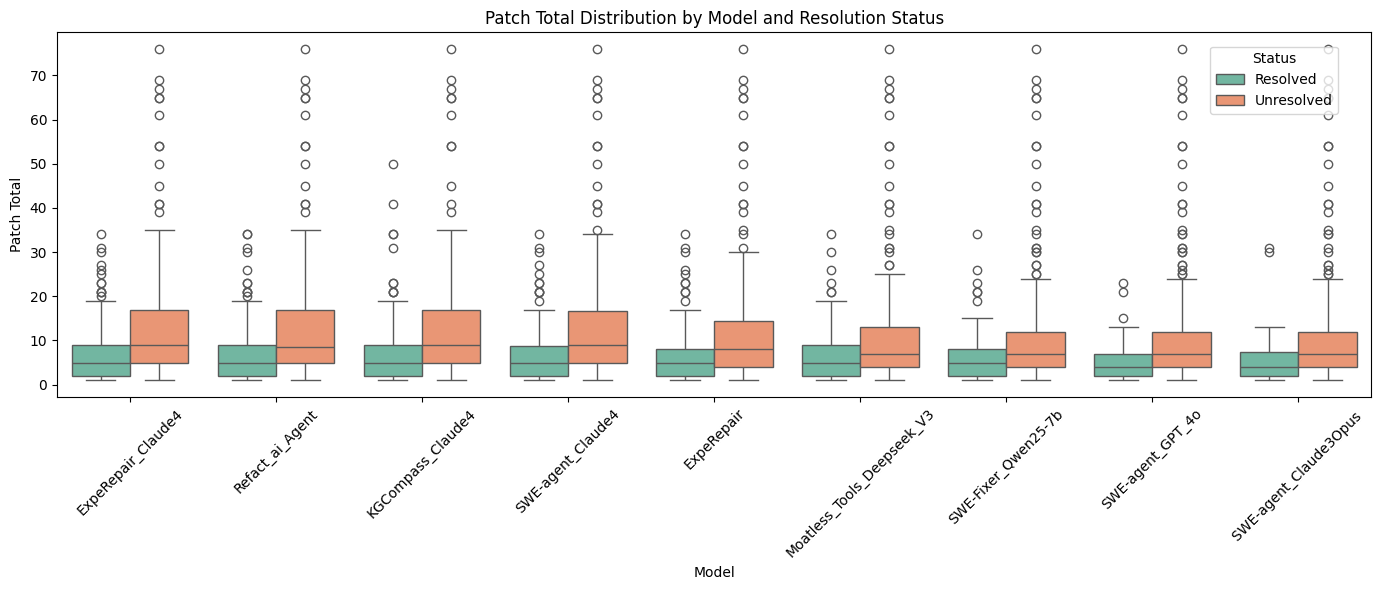

In [44]:
# Map 0/1 to readable labels
df_long['ResolvedLabel'] = df_long['Resolved'].map({1: 'Resolved', 0: 'Unresolved'})

plt.figure(figsize=(14,6))

sns.boxplot(
    x='Model',
    y='patch_total',  # changed from difficulty_score
    hue='ResolvedLabel',
    data=df_long,
    palette='Set2',
    hue_order=['Resolved', 'Unresolved']
)

plt.xticks(rotation=45)
plt.ylabel("Patch Total")
plt.title("Patch Total Distribution by Model and Resolution Status")

# Legend inside the axes, top-right
plt.legend(
    title="Status",
    loc='upper right',
    bbox_to_anchor=(0.98, 0.98)
)
plt.tight_layout()
plt.savefig(save_path + "patch_total_boxplot.png")
plt.show()


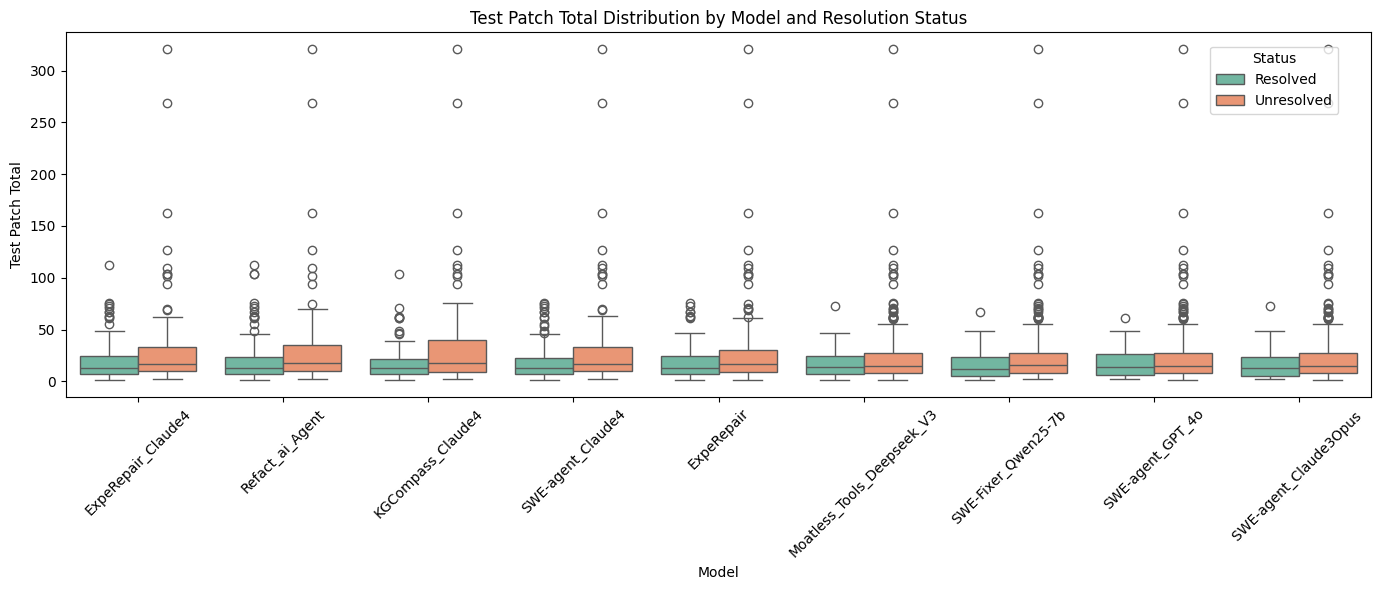

In [47]:
# Melt dataframe to long format for seaborn
df_long = df.melt(id_vars=['test_patch_total'], value_vars=model_cols,
                  var_name='Model', value_name='Resolved')

# Map 0/1 to readable labels
df_long['ResolvedLabel'] = df_long['Resolved'].map({1: 'Resolved', 0: 'Unresolved'})

plt.figure(figsize=(14,6))

sns.boxplot(
    x='Model',
    y='test_patch_total',  # changed from previous
    hue='ResolvedLabel',
    data=df_long,
    palette='Set2',
    hue_order=['Resolved', 'Unresolved']
)

plt.xticks(rotation=45)
plt.ylabel("Test Patch Total")
plt.title("Test Patch Total Distribution by Model and Resolution Status")

# Legend inside the axes, top-right
plt.legend(
    title="Status",
    loc='upper right',
    bbox_to_anchor=(0.98, 0.98)
)

plt.tight_layout()
plt.savefig(save_path + "test_patch_total_boxplot.png")
plt.show()


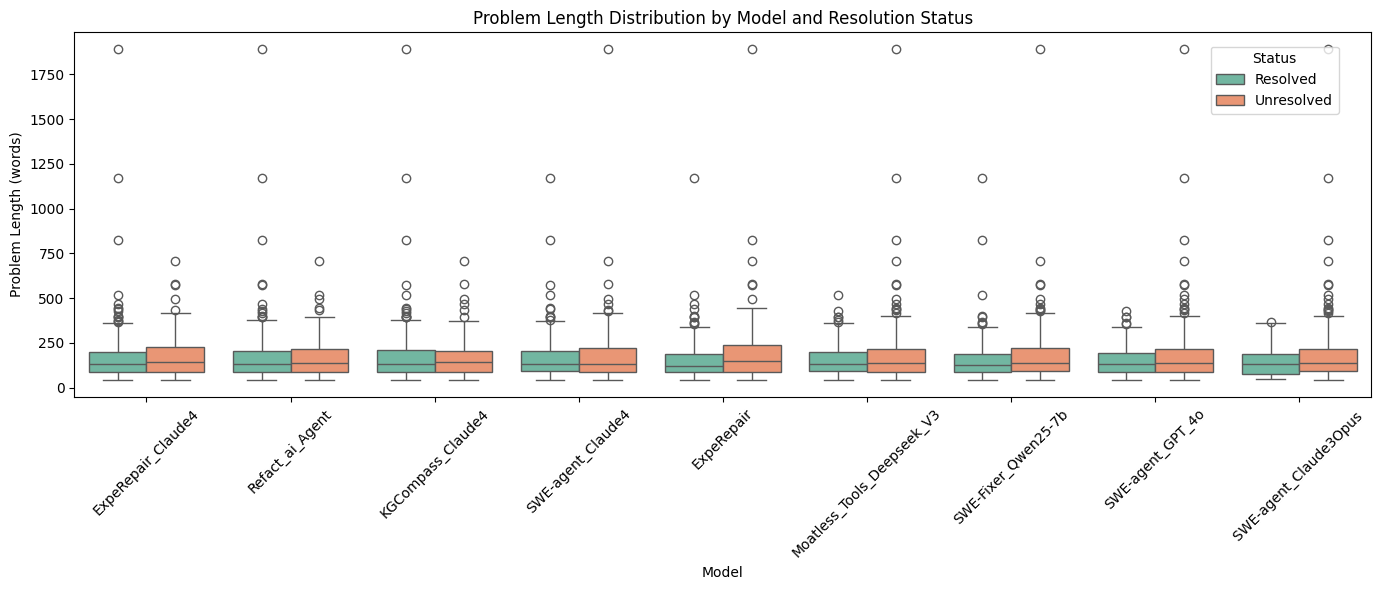

In [49]:
# Melt dataframe to long format for seaborn
df_long = df.melt(id_vars=['problem_length_words'], value_vars=model_cols,
                  var_name='Model', value_name='Resolved')

# Map 0/1 to readable labels
df_long['ResolvedLabel'] = df_long['Resolved'].map({1: 'Resolved', 0: 'Unresolved'})

plt.figure(figsize=(14,6))

sns.boxplot(
    x='Model',
    y='problem_length_words',  # changed from previous
    hue='ResolvedLabel',
    data=df_long,
    palette='Set2',
    hue_order=['Resolved', 'Unresolved']
)

plt.xticks(rotation=45)
plt.ylabel("Problem Length (words)")
plt.title("Problem Length Distribution by Model and Resolution Status")

# Legend inside the axes, top-right
plt.legend(
    title="Status",
    loc='upper right',
    bbox_to_anchor=(0.98, 0.98)
)

plt.tight_layout()
plt.savefig(save_path + "problem_length_boxplot.png")
plt.show()


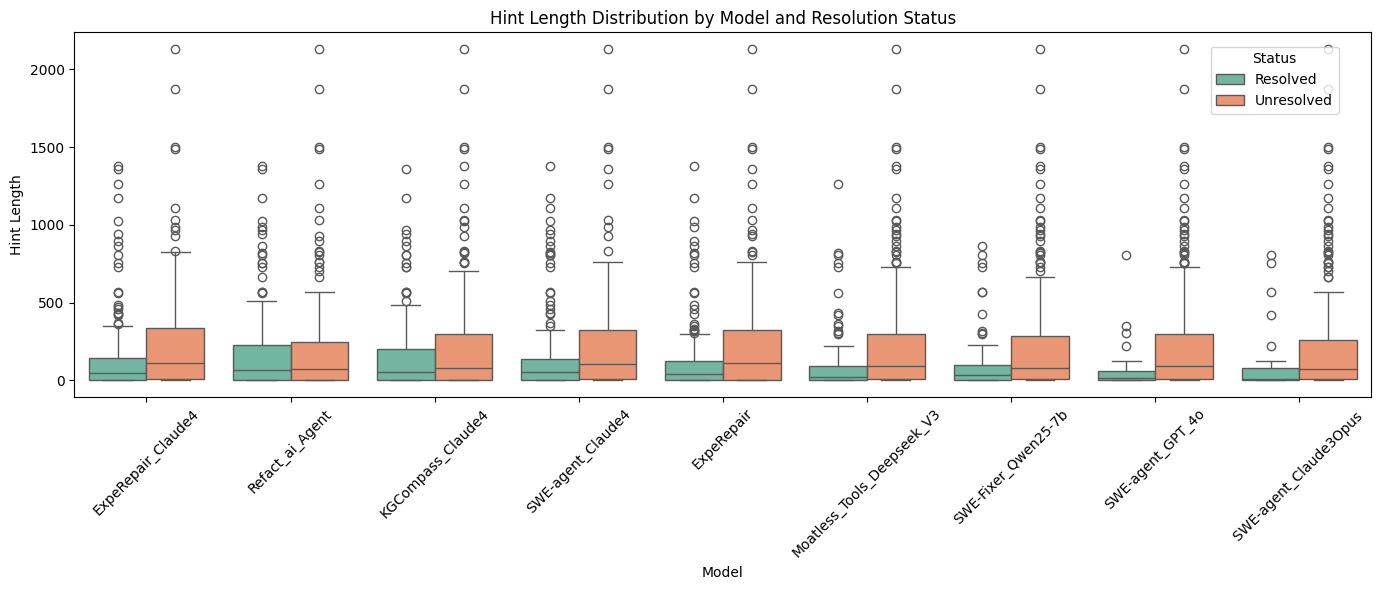

In [51]:
# Melt dataframe to long format for seaborn
df_long = df.melt(id_vars=['hint_length'], value_vars=model_cols,
                  var_name='Model', value_name='Resolved')

# Map 0/1 to readable labels
df_long['ResolvedLabel'] = df_long['Resolved'].map({1: 'Resolved', 0: 'Unresolved'})

plt.figure(figsize=(14,6))

sns.boxplot(
    x='Model',
    y='hint_length',  # changed from previous
    hue='ResolvedLabel',
    data=df_long,
    palette='Set2',
    hue_order=['Resolved', 'Unresolved']
)

plt.xticks(rotation=45)
plt.ylabel("Hint Length")
plt.title("Hint Length Distribution by Model and Resolution Status")

# Legend inside the axes, top-right
plt.legend(
    title="Status",
    loc='upper right',
    bbox_to_anchor=(0.98, 0.98)
)

plt.tight_layout()
plt.savefig(save_path + "hint_length_boxplot.png")
plt.show()


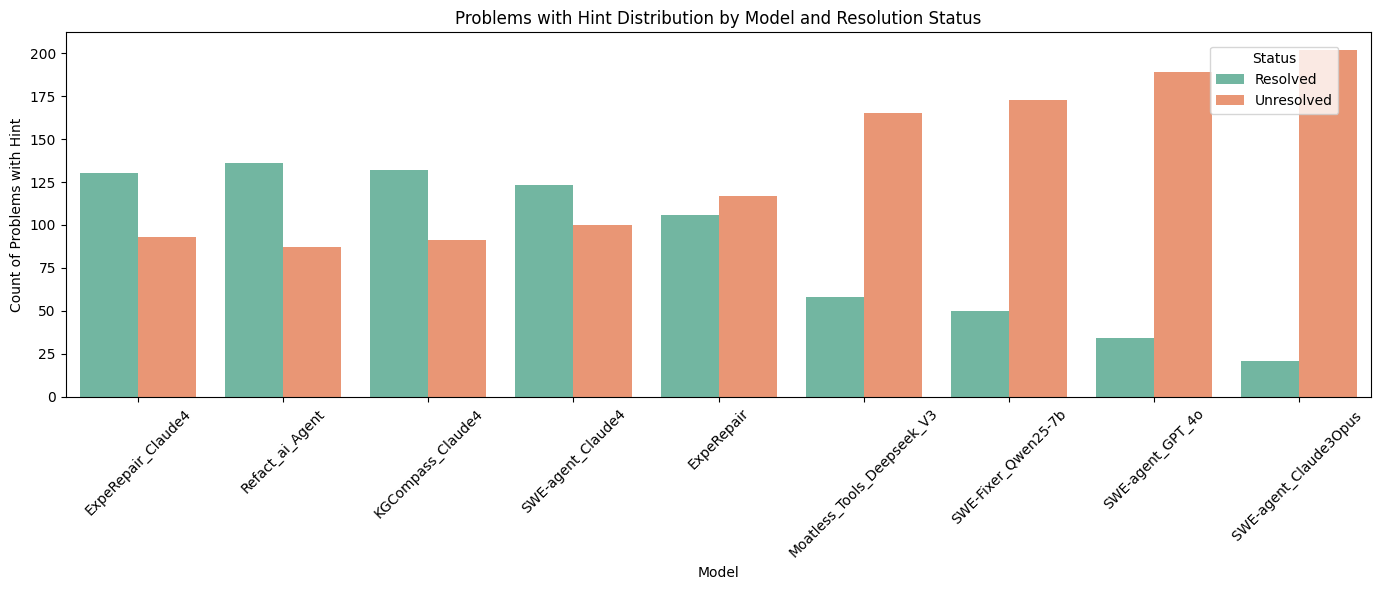

In [52]:
# Melt dataframe to long format for seaborn
df_long = df.melt(id_vars=['has_hint'], value_vars=model_cols,
                  var_name='Model', value_name='Resolved')

# Map 0/1 to readable labels
df_long['ResolvedLabel'] = df_long['Resolved'].map({1: 'Resolved', 0: 'Unresolved'})

plt.figure(figsize=(14,6))

sns.countplot(
    x='Model',
    hue='ResolvedLabel',
    data=df_long[df_long['has_hint']==1],  # only count where has_hint is True
    palette='Set2',
    hue_order=['Resolved', 'Unresolved']
)

plt.xticks(rotation=45)
plt.ylabel("Count of Problems with Hint")
plt.title("Problems with Hint Distribution by Model and Resolution Status")

# Legend inside the axes, top-right
plt.legend(
    title="Status",
    loc='upper right',
    bbox_to_anchor=(0.98, 0.98)
)

plt.tight_layout()
plt.show()
